In [1]:
%run advanced_simulator.py

KeyboardInterrupt: 

Seed 2785093232
AVLTree({0.0: 0, 5.0: -1})
Clonal node: 21
Success: hgt_rate = 0.3, Total computation time = 0.442584 seconds.
SVG gespeichert unter: D:\Downloads\simulation.svg


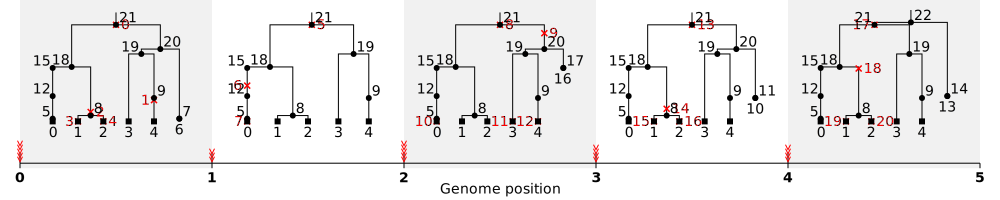

In [21]:
import secrets

import simulator
import advanced_simulator
import msprime
import numpy as np
import re
import tskit
import random


num_simulations = 1

theta = 11
rho = 0.1
num_samples = 5
#num_sites = 3
num_sites = 5

hgt_rate = 0.3

# Seed:
seed = 1  # Hier kannst du deinen gewünschten Seed setzen

# Setze die Seeds für verschiedene Zufallsfunktionen
#random.seed(seed)  # Standard-Python-Zufallszahlen
#np.random.seed(seed)  # NumPy-Zufallszahlen

clonal_tree = msprime.sim_ancestry(
            samples=num_samples,
            sequence_length=1,
            ploidy=1,
            recombination_rate=0,
            gene_conversion_rate=0,
            gene_conversion_tract_length=1,  # One gene
            random_seed=seed,
        )

ce_from_nwk = clonal_tree.first().newick()

clonal_root_time = np.max(clonal_tree.tables.nodes.time)

#seed = 84
# Extra:


mts = advanced_simulator.simulator(theta = theta, rho = rho, num_samples = num_samples, num_sites = num_sites, hgt_rate = hgt_rate, ce_from_nwk = ce_from_nwk)
"""
print("The clonal tree is fixed. The Hgt Events are different for each gene, i.e. for each site.")
print("Rate for two lines to coalesence: " , 1)
print("Rate for Hgt Events (per branch): " , hgt_rate)
print("Infinite sites model: One Gene gain per site. This gain can be in the clonal root. The number of losses is Poisson distributed.")
print(mts.tables.mutations)
"""
#print(mts.tables.edges)


svg = mts.draw_svg()  # SVG-Objekt wird erstellt

# Datei in D:\Downloads speichern
file_path = r"D:\Downloads\simulation.svg"  # 'r' vor dem String für Windows-Pfade
with open(file_path, "w", encoding="utf-8") as f:
    f.write(svg)  # SVG-String in Datei schreiben

print(f"SVG gespeichert unter: {file_path}")
mts.draw_svg() 

#seed(clonal) = 1
#seed = 397


In [46]:
gene_absence_presence_matrix = []

for var in mts.variants():
    gene_absence_presence_matrix.append(var.genotypes)
gene_absence_presence_matrix = np.array(gene_absence_presence_matrix)

mutations = mts.tables.mutations

# Metadaten-Array extrahieren
metadata = np.array([int.from_bytes(m.metadata, "little") for m in mutations])

# Sites extrahieren
sites = np.array(mutations.site)

# Für jede Site zählen, wie oft metadata == 1 ist
unique_sites = np.unique(sites)
counts = np.array([np.sum(metadata[sites == site] == 1) for site in unique_sites])

print(sites)
print(metadata)
print(counts)
print(mutations)

counts = counts.reshape(-1, 1)  # Umwandlung in Spaltenvektor (N, 1)

# Sicherstellen, dass die Dimensionen passen
if counts.shape[0] != gene_absence_presence_matrix.shape[0]:
    raise ValueError("Counts und gene_absence_presence_matrix haben nicht die gleiche Anzahl an Zeilen!")

# Counts als erste Spalte hinzufügen
gene_absence_presence_matrix = np.hstack((counts, gene_absence_presence_matrix))

gene_absence_presence_matrix

[0 0 0 0 0 1 1 1 2 2 2 2 2 3 3 3 3 4 4 4 4]
[3 3 7 0 0 3 7 0 3 7 1 0 0 3 7 0 0 3 7 0 0]
[0 0 1 0 0]
╔══╤════╤════╤══════════╤═════════════╤══════╤════════╗
║id│site│node│time      │derived_state│parent│metadata║
╠══╪════╪════╪══════════╪═════════════╪══════╪════════╣
║0 │   0│  21│0.89268177│       absent│    -1│ b'\x03'║
║1 │   0│   4│0.19658133│       absent│    -1│ b'\x03'║
║2 │   0│   8│0.08704388│      present│    -1│ b'\x07'║
║3 │   0│   1│0.00000000│      present│    -1│ b'\x00'║
║4 │   0│   2│0.00000000│      present│    -1│ b'\x00'║
║5 │   1│  21│0.89268177│       absent│    -1│ b'\x03'║
║6 │   1│  12│0.33084311│      present│    -1│ b'\x07'║
║7 │   1│   0│0.00000000│      present│    -1│ b'\x00'║
║8 │   2│  21│0.89268177│       absent│    -1│ b'\x03'║
║9 │   2│  20│0.81514590│      present│    -1│ b'\x07'║
║10│   2│   0│0.00000000│      present│    -1│ b'\x01'║
║11│   2│   3│0.00000000│      present│    -1│ b'\x00'║
║12│   2│   4│0.00000000│      present│    -1│ b'\x00'║
║13│

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [5]:
print(mts.tables.mutations)

import time
test = 1
from IPython.display import display

while test < 1:
    # Options: 34, 51, 60, 71
    mts = advanced_simulator.simulator(theta = theta, rho = 0.5, num_samples = num_samples, num_sites = num_sites, hgt_rate = hgt_rate, ce_from_nwk = ce_from_nwk)
    test = test + 1
    #time.sleep(2)
    
    svg = mts.draw_svg()  # SVG-Objekt wird erstellt
    #print("Seed", seed)
    display(svg)  # Zeigt es an

╔══╤════╤════╤══════════╤═════════════╤══════╤════════╗
║id│site│node│time      │derived_state│parent│metadata║
╠══╪════╪════╪══════════╪═════════════╪══════╪════════╣
║0 │   0│  21│0.89268177│       absent│    -1│ b'\x03'║
║1 │   0│   9│0.61531429│       absent│    -1│ b'\x03'║
║2 │   0│   9│0.61225785│       absent│    -1│ b'\x03'║
║3 │   0│   9│0.41504529│       absent│    -1│ b'\x03'║
║4 │   0│  12│0.34731724│       absent│    -1│ b'\x03'║
║5 │   0│   2│0.05337852│       absent│    -1│ b'\x03'║
║6 │   0│   2│0.01127905│       absent│    -1│ b'\x03'║
║7 │   0│   1│0.00569591│      present│    -1│ b'\x07'║
║8 │   0│   1│0.00000000│      present│    -1│ b'\x00'║
║9 │   1│  21│0.89268177│       absent│    -1│ b'\x03'║
║10│   1│  12│0.44707505│       absent│    -1│ b'\x03'║
║11│   1│   3│0.43552999│      present│    -1│ b'\x07'║
║12│   1│   3│0.00000000│      present│    -1│ b'\x00'║
║13│   2│  21│0.89268177│       absent│    -1│ b'\x03'║
║14│   2│  18│0.84109347│       absent│    -1│ b

In [79]:
gene_absence_presence_matrix_single = []

"""
for i in range(1000):
    mts = advanced_simulator.simulator(theta = theta, rho = rho, num_samples = num_samples, num_sites = num_sites, hgt_rate = hgt_rate, ce_from_nwk = ce_from_nwk)

    for var in mts.variants():
        gene_absence_presence_matrix_single.append(var.genotypes)

"""

mts = advanced_simulator.simulator(theta = theta, rho = rho, num_samples = num_samples, num_sites = num_sites, hgt_rate = hgt_rate, ce_from_nwk = ce_from_nwk, seed = seed)


mts_times = np.sort(mts.tables.nodes.time)

# Anzahl der Nodes mit größerer Zeit
count_greater = np.sum(mts_times > clonal_root_time)

# Gesamte Anzahl der Nodes in mts
total_count = len(mts_times)

# Verhältnis in Prozent
percentage = (count_greater / total_count) * 100

print(f"{percentage:.2f}% der Nodes in mts haben eine größere Zeit als clonal_root_time.")

#clonal_tree.draw_svg()

AVLTree({0.0: 0, 3.0: -1})
Clonal node: 35
Success: hgt_rate = 0.3, Total computation time = 0.354002 seconds.
20.45% der Nodes in mts haben eine größere Zeit als clonal_root_time.


In [3]:
mutation_time_and_occurence_in_samples = []

for tree in mts.trees(): 
    for site in tree.sites():
        present_mutations = [mutation for mutation in site.mutations if mutation.derived_state == "present"]
        gain_time = max(present_mutations, key=lambda m: m.time).time
        
        occurence_in_samples = len(present_mutations)-1
        mutation_time_and_occurence_in_samples.append([gain_time, occurence_in_samples])


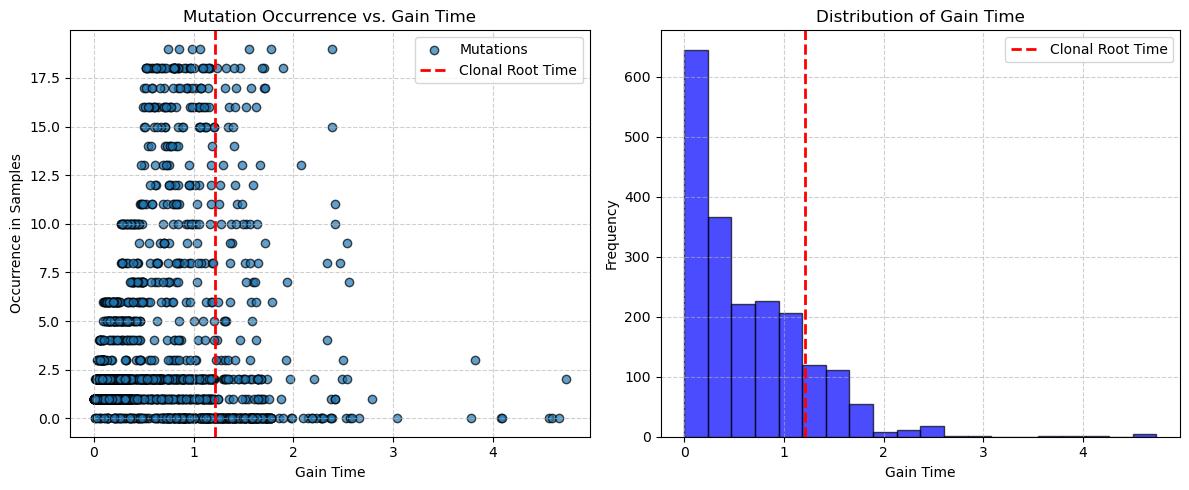

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sicherstellen, dass mutation_time_and_occurence_in_samples ein NumPy-Array ist
mutation_time_and_occurence_in_samples = np.array(mutation_time_and_occurence_in_samples)

# Werte für x- und y-Achse extrahieren
gain_time = mutation_time_and_occurence_in_samples[:, 0]
occurence_in_samples = mutation_time_and_occurence_in_samples[:, 1]
clonal_root_time = np.max(clonal_tree.tables.nodes.time)

# Erstelle eine Figur mit zwei Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Scatter-Plot: Occurrence vs. Gain Time
axes[0].scatter(gain_time, occurence_in_samples, alpha=0.7, edgecolors="black", label="Mutations")
axes[0].axvline(x=clonal_root_time, color="red", linestyle="--", linewidth=2, label="Clonal Root Time")
axes[0].set_xlabel("Gain Time")
axes[0].set_ylabel("Occurrence in Samples")
axes[0].set_title("Mutation Occurrence vs. Gain Time")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend()

# 2. Histogramm: Verteilung der Gain Time
axes[1].hist(gain_time, bins=20, color="blue", alpha=0.7, edgecolor="black")
axes[1].axvline(x=clonal_root_time, color="red", linestyle="--", linewidth=2, label="Clonal Root Time")
axes[1].set_xlabel("Gain Time")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Gain Time")
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend()

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()


In [19]:
import numpy as np
gene_absence_presence_matrix_combined = []

mts = advanced_simulator.simulator(theta = theta, rho = rho, num_samples = num_samples, num_sites = 1000, hgt_rate = hgt_rate, ce_from_nwk = ce_from_nwk)

for var in mts.variants():
    gene_absence_presence_matrix_combined.append(var.genotypes)
    
gene_absence_presence_matrix_combined = np.array(gene_absence_presence_matrix_combined)


AVLTree({0.0: 0, 1000.0: -1})
Success: hgt_rate = 0.5, Total computation time = 11.252468 seconds.


In [20]:
gene_absence_presence_matrix_single_df = np.array(gene_absence_presence_matrix_single)
gene_absence_presence_matrix_combined_df = np.array(gene_absence_presence_matrix_combined)


# Häufigkeit der Zeilen in der ersten Matrix zählen
unique_rows_single, counts_single = np.unique(gene_absence_presence_matrix_single_df, axis=0, return_counts=True)

# Häufigkeit der Zeilen in der zweiten Matrix zählen
unique_rows_combined, counts_combined = np.unique(gene_absence_presence_matrix_combined_df, axis=0, return_counts=True)

# Ausgabe der Ergebnisse
print("Einzigartige Zeilen und ihre Häufigkeit in SINGLE:")
for row, count in zip(unique_rows_single, counts_single):
    print(row, "->", count)

print("\nEinzigartige Zeilen und ihre Häufigkeit in COMBINED:")
for row, count in zip(unique_rows_combined, counts_combined):
    print(row, "->", count)

Einzigartige Zeilen und ihre Häufigkeit in SINGLE:
[0 0 0 0] -> 100
[0 0 0 1] -> 67
[0 0 1 0] -> 73
[0 0 1 1] -> 47
[0 1 0 0] -> 313
[0 1 0 1] -> 8
[0 1 1 0] -> 8
[0 1 1 1] -> 147
[1 0 0 0] -> 237

Einzigartige Zeilen und ihre Häufigkeit in COMBINED:
[0 0 0 0] -> 178
[0 0 0 1] -> 26
[0 0 1 0] -> 55
[0 0 1 1] -> 43
[0 1 0 0] -> 88
[0 1 0 1] -> 14
[0 1 1 0] -> 12
[0 1 1 1] -> 228
[1 0 0 0] -> 277
[1 0 0 1] -> 5
[1 0 1 0] -> 5
[1 0 1 1] -> 7
[1 1 0 0] -> 9
[1 1 0 1] -> 4
[1 1 1 0] -> 1
[1 1 1 1] -> 48


(1:0.41006813043779,(3:0.11274535923094,(2:0.10649036753169,4:0.10649036753169):0.00625499169924):0.29732277120685);


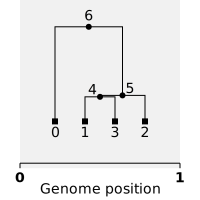

In [30]:
example_tree = msprime.sim_ancestry(
            samples=num_samples,
            sequence_length=1,
            ploidy=1,
            recombination_rate=0,
            gene_conversion_rate=0,
            gene_conversion_tract_length=1,  # One gene
        )

ce_from_nwk_example = example_tree.first().newick()

print(ce_from_nwk_example)

example_tree.draw_svg()

In [34]:
mts.tables.mutations.reset

id,flags,population,individual,time,metadata
0,1,0,0,0.00000000,
1,1,0,1,0.00000000,
2,1,0,2,0.00000000,
3,1,0,3,0.00000000,
4,0,0,-1,0.19162858,
5,0,0,-1,0.30035858,
6,0,0,-1,1.47878180,
